# FID Bar Chart

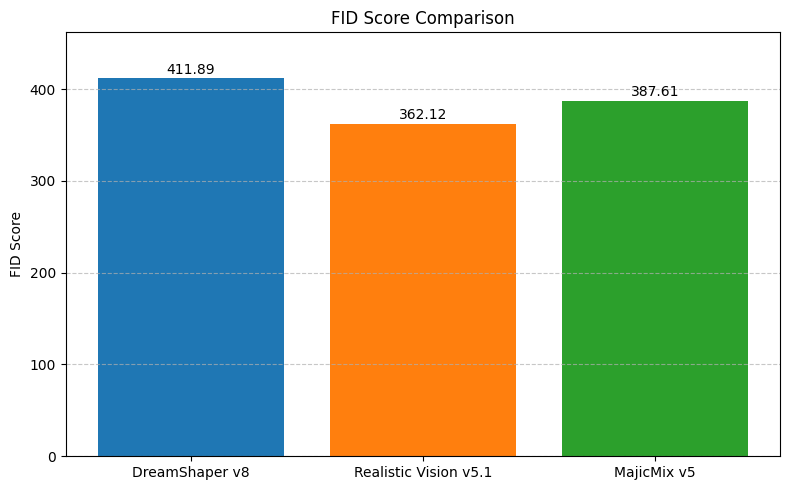

In [6]:
import matplotlib.pyplot as plt

models = ['DreamShaper v8', 'Realistic Vision v5.1', 'MajicMix v5']
fid_scores = [411.89, 362.12, 387.61]

plt.figure(figsize=(8, 5))
bars = plt.bar(models, fid_scores, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('FID Score Comparison')
plt.ylabel('FID Score')
plt.ylim(0, max(fid_scores) + 50)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 5, f'{height:.2f}', ha='center')

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Radar Chart for KID, SSIM, LPIPS, CLIP-S

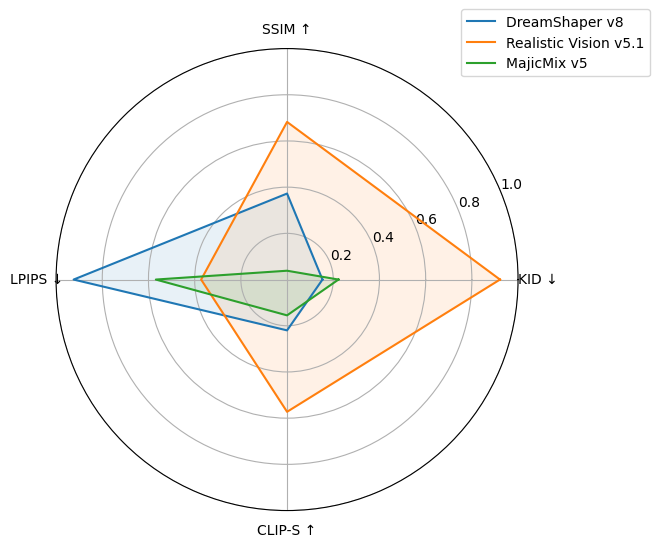

In [5]:
import numpy as np
from math import pi
import matplotlib.pyplot as plt

metrics = ['KID ↓', 'SSIM ↑', 'LPIPS ↓', 'CLIP-S ↑']
model_names = ['DreamShaper v8', 'Realistic Vision v5.1', 'MajicMix v5']

scores = {
    'DreamShaper v8': [0.1816, 0.3933, 0.6076, 0.2688],
    'Realistic Vision v5.1': [0.0894, 0.4460, 0.6628, 0.2829],
    'MajicMix v5': [0.1733, 0.3365, 0.6432, 0.2662],
}

max_vals = np.array([0.2, 0.5, 0.7, 0.3])
min_vals = np.array([0.08, 0.33, 0.6, 0.26])
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]

plt.figure(figsize=(8, 6))
ax = plt.subplot(111, polar=True)

for model in model_names:
    values = np.array(scores[model])
    norm = (values - min_vals) / (max_vals - min_vals)
    inverted = [1 - norm[0], norm[1], 1 - norm[2], norm[3]]
    data = inverted + inverted[:1]
    ax.plot(angles, data, label=model)
    ax.fill(angles, data, alpha=0.1)

ax.set_thetagrids(np.degrees(angles[:-1]), metrics)
ax.set_ylim(0, 1)
ax.grid(True)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()
